**Nguyen Phan Tri Duc - 2152528**

# Set up
```bash
!./darknet detector test <path to .data file> <path to config> <path to weights> <path to image> <-thresh=...> <-ext_output>
show_image('predictions.jpg')
```

## Downloading repos

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet
!git clone https://github.com/ducngg/traffic-sign-detector

Cloning into 'darknet'...
remote: Enumerating objects: 15521, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15521 (delta 0), reused 5 (delta 0), pack-reused 15514
Receiving objects: 100% (15521/15521), 14.19 MiB | 23.22 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.
Cloning into 'traffic-sign-detector'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 2), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (18/18), 4.14 KiB | 1.38 MiB/s, done.


In [2]:
# change makefile for enabling GPU, CUDA and OPENCV
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

# make darknet (may take a while)
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-inden

## Some important files (necessary for either training or detecting)

In [3]:
%cd ..

!cp ./traffic-sign-detector/yolov4-obj.cfg          ./darknet/cfg
!cp ./traffic-sign-detector/obj.names               ./darknet/data
!cp ./traffic-sign-detector/obj.data                ./darknet/data
!cp ./traffic-sign-detector/yolov4-obj_last.weights ./darknet

%cd darknet

/content
/content/darknet


# Training section - Connect to Google Drive (just for me, use it to train)

In [ ]:
%cd ..

from google.colab import drive
drive.mount('/content/gdrive')

# change "/content/gdrive/My\ Drive/"  to "/mydrive"
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive/yolov4

%cd darknet

# datasets
!cp /mydrive/yolov4/obj.zip .
!cp /mydrive/yolov4/test.zip .

# unzip to /darknet/data/obj/ and /darknet/data/test/
!unzip obj.zip -d data/
!unzip test.zip -d data/

cp: cannot stat '/mydrive/yolov4/obj.zip': No such file or directory
cp: cannot stat '/mydrive/yolov4/test.zip': No such file or directory
unzip:  cannot find or open obj.zip, obj.zip.zip or obj.zip.ZIP.
unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.


## Generating train.txt and test.txt (text files contain path to images)

In [ ]:
### Currently at /darknet
import os

obj_image_files = []
for filename in os.listdir(os.path.join("data", "obj")):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        obj_image_files.append("data/obj/" + filename)

test_image_files = []
for filename in os.listdir(os.path.join("data", "test")):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        test_image_files.append("data/test/" + filename)

with open("data/train.txt", "w") as txtfile:
    for image_file in obj_image_files:
        txtfile.write(image_file + "\n")
    txtfile.close()

with open("data/test.txt", "w") as txtfile:
    for image_file in test_image_files:
        txtfile.write(image_file + "\n")
    txtfile.close()

# verify train.txt and test.txt are in darknet/data 
!ls data/


## Start training

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.845620), count: 9, class_loss = 0.008713, iou_loss = 0.244158, total_loss = 0.252871 
 total_bbox = 244900, rewritten_bbox = 0.195998 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.839128), count: 39, class_loss = 1.847699, iou_loss = 78.608444, total_loss = 80.456146 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.882314), count: 17, class_loss = 0.692324, iou_loss = 4.260197, total_loss = 4.952521 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.902507), count: 4, class_loss = 0.001693, iou_loss = 0.158785, total_loss = 0.160478 
 total_bbox = 244960, rewritten_bbox = 0.195950 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.788835), count: 14, class_loss = 2.284487, iou_loss = 38.488308, total_loss = 40.772

## Loss chart

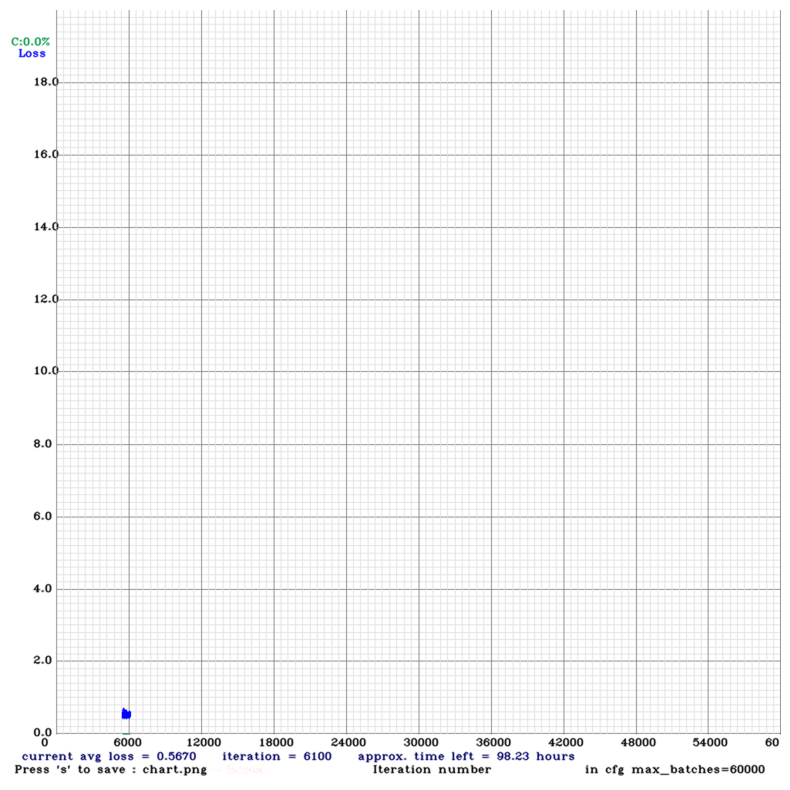

In [ ]:
# show chow custom object detector did with training
show_image('chart.png')

# Checking mAP

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg yolov4-obj_last.weights

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

for conf_thresh = 0.25, precision = 0.80, recall = 0.78, F1-score = 0.79 
 for conf_thresh = 0.25, TP = 834, FP = 212, FN = 235, average IoU = 63.44 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.841413, or 84.14 % 
Total Detection Time: 16 Seconds

# Run section

## Function for displaying image

In [ ]:
def show_image(filename):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(filename)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
# Set cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..


/content/darknet/cfg
/content/darknet


## Google Drive Image
Run detector on image stored in Google Drive

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 

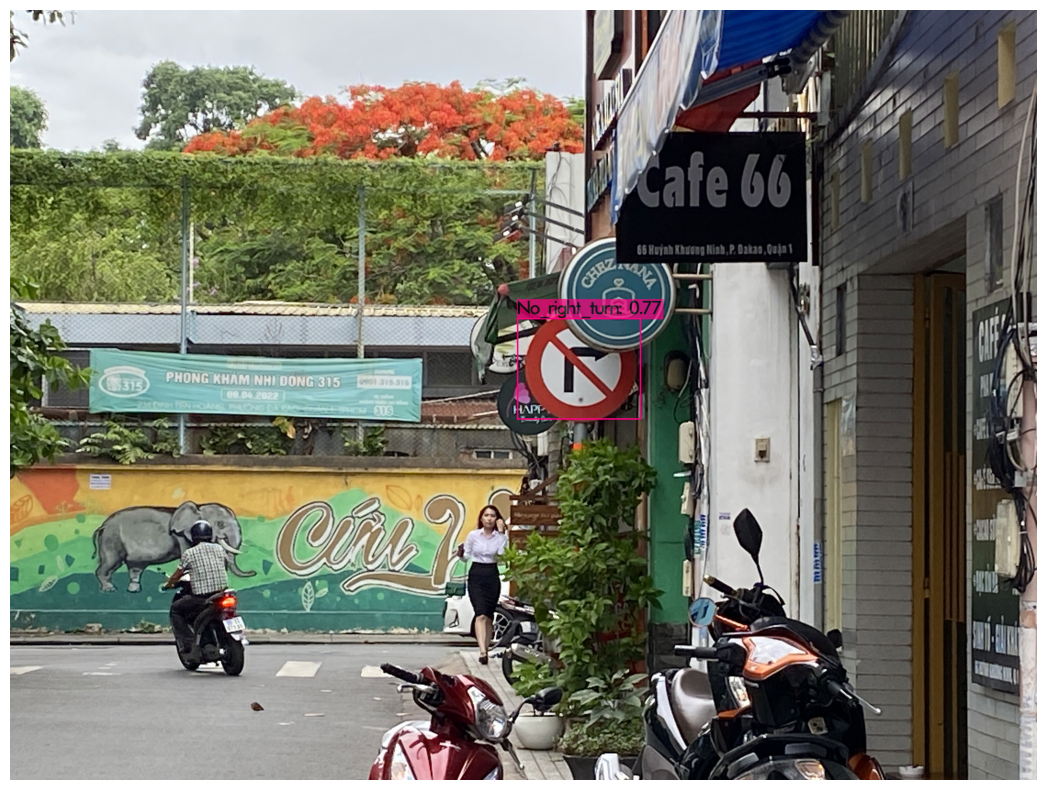

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights /mydrive/yolov4/606/IMG_2416.JPG -thresh 0.5
show_image('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, GPU count: 1  
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x

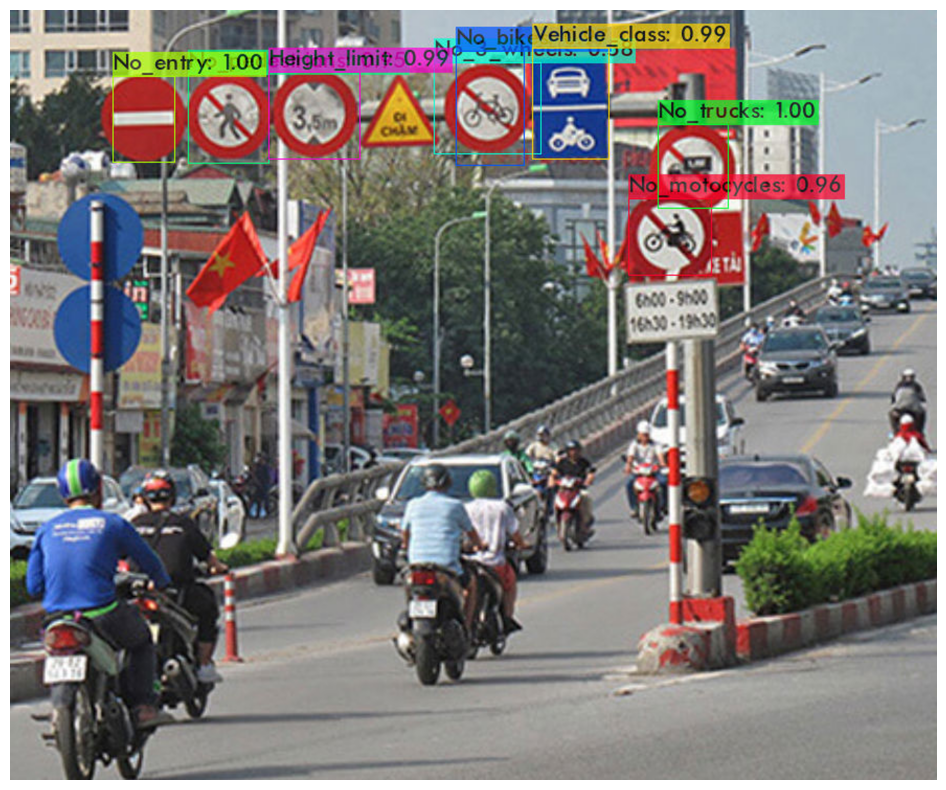

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights /mydrive/images/test16.png -thresh 0.5
show_image('predictions.jpg')

## Google Drive Video
Run detector on video stored in Google Drive, and save the output video to Google Drive

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show /mydrive/images/nguyenthaihoctrimmed.mp4 -i 0 -out_filename /mydrive/images/nguyenthaihoc.avi

Streaming output truncated to the last 5000 lines.


FPS:15.0 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:15.2 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:15.6 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:16.2 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:16.7 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:17.2 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:

Directions: 44% 

FPS:17.2 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:

Directions: 42% 

FPS:17.5 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:

Directions: 81% 

FPS:17.9 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:17.3 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:17.0 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:16.5 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:16.2 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:16.9 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:17.0 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:

No_trucks: 35% 

FPS:16.6 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:


FPS:16.6 	 AVG_FPS:15.4

 cvWriteFrame 
Objects:

No_trucks: 40%

## Webcam
Run detector on webcam (create some helper functions then run the script at the bottom)

In [4]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

from darknet import *
# loading the model
network, class_names, class_colors = load_network("cfg/yolov4-obj.cfg", "data/obj.data", "yolov4-obj_last.weights")
width = network_width(network)
height = network_height(network)

# running detection on image
def darknet_helper(img, width, height):
    darknet_image = make_image(width, height, 3)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (width, height),
                                interpolation=cv2.INTER_LINEAR)

    # get image ratios to convert bounding boxes to proper size
    img_height, img_width, _ = img.shape
    width_ratio = img_width/width
    height_ratio = img_height/height

    # run model on darknet style image to get detections
    copy_image_from_bytes(darknet_image, img_resized.tobytes())
    detections = detect_image(network, class_names, darknet_image)
    free_image(darknet_image)
    return detections, width_ratio, height_ratio

# converting JS object into an OpenCV image
def js_to_image(js_reply):
    """
    Params:
            js_reply: JavaScript object containing image from webcam
    Returns:
            img: OpenCV BGR image
    """
    # decode base64 image
    image_bytes = b64decode(js_reply.split(',')[1])
    # convert bytes to numpy array
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    # decode numpy array into OpenCV BGR image
    img = cv2.imdecode(jpg_as_np, flags=1)

    return img

# converting OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
    """
    Params:
            bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
    Returns:
          bytes: Base64 image byte string
    """
    # convert array into PIL image
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    # format bbox into png for return
    bbox_PIL.save(iobuf, format='png')
    # format return string
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

    return bbox_bytes

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
      ''')
    display(js)

    # get photo
    data = eval_js('takePhoto({})'.format(quality))
    # get OpenCV format
    img = js_to_image(data) 

    # take detections
    detections, width_ratio, height_ratio = darknet_helper(img, width, height)

    # draw them on webcam image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      cv2.rectangle(img, (left, top), (right, bottom), class_colors[label], 2)
      cv2.putText(img, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)
    # save image
    cv2.imwrite(filename, img)

    return filename

# JS for properly creating live video stream using webcam as input
def video_stream():
    js = Javascript('''
      var video;
      var div = null;
      var stream;
      var captureCanvas;
      var imgElement;
      var labelElement;
      
      var pendingResolve = null;
      var shutdown = false;
      
      function removeDom() {
        stream.getVideoTracks()[0].stop();
        video.remove();
        div.remove();
        video = null;
        div = null;
        stream = null;
        imgElement = null;
        captureCanvas = null;
        labelElement = null;
      }
      
      function onAnimationFrame() {
        if (!shutdown) {
          window.requestAnimationFrame(onAnimationFrame);
        }
        if (pendingResolve) {
          var result = "";
          if (!shutdown) {
            captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
            result = captureCanvas.toDataURL('image/jpeg', 0.8)
          }
          var lp = pendingResolve;
          pendingResolve = null;
          lp(result);
        }
      }
      
      async function createDom() {
        if (div !== null) {
          return stream;
        }

        div = document.createElement('div');
        div.style.border = '2px solid black';
        div.style.padding = '3px';
        div.style.width = '100%';
        div.style.maxWidth = '600px';
        document.body.appendChild(div);
        
        const modelOut = document.createElement('div');
        modelOut.innerHTML = "<span>Status:</span>";
        labelElement = document.createElement('span');
        labelElement.innerText = 'No data';
        labelElement.style.fontWeight = 'bold';
        modelOut.appendChild(labelElement);
        div.appendChild(modelOut);
            
        video = document.createElement('video');
        video.style.display = 'block';
        video.width = div.clientWidth - 6;
        video.setAttribute('playsinline', '');
        video.onclick = () => { shutdown = true; };
        stream = await navigator.mediaDevices.getUserMedia(
            {video: { facingMode: "environment"}});
        div.appendChild(video);

        imgElement = document.createElement('img');
        imgElement.style.position = 'absolute';
        imgElement.style.zIndex = 1;
        imgElement.onclick = () => { shutdown = true; };
        div.appendChild(imgElement);
        
        const instruction = document.createElement('div');
        instruction.innerHTML = 
            '<span style="color: red; font-weight: bold;">' +
            'When finished, click here or on the video to stop this demo</span>';
        div.appendChild(instruction);
        instruction.onclick = () => { shutdown = true; };
        
        video.srcObject = stream;
        await video.play();

        captureCanvas = document.createElement('canvas');
        captureCanvas.width = 640; //video.videoWidth;
        captureCanvas.height = 480; //video.videoHeight;
        window.requestAnimationFrame(onAnimationFrame);
        
        return stream;
      }
      async function stream_frame(label, imgData) {
        if (shutdown) {
          removeDom();
          shutdown = false;
          return '';
        }

        var preCreate = Date.now();
        stream = await createDom();
        
        var preShow = Date.now();
        if (label != "") {
          labelElement.innerHTML = label;
        }
              
        if (imgData != "") {
          var videoRect = video.getClientRects()[0];
          imgElement.style.top = videoRect.top + "px";
          imgElement.style.left = videoRect.left + "px";
          imgElement.style.width = videoRect.width + "px";
          imgElement.style.height = videoRect.height + "px";
          imgElement.src = imgData;
        }
        
        var preCapture = Date.now();
        var result = await new Promise(function(resolve, reject) {
          pendingResolve = resolve;
        });
        shutdown = false;
        
        return {'create': preShow - preCreate, 
                'show': preCapture - preShow, 
                'capture': Date.now() - preCapture,
                'img': result};
      }
      ''')

    display(js)
  
def video_frame(label, bbox):
    data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
    return data

Start run webcam

In [5]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>